In [1164]:
import pandas as pd

df = pd.read_csv(r"C:\Programming\Data\Education\SemiSemestr\AI\DataSets\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Этот датасет выживших или нет на титанике, нужно сделать предсказание выживет человек или нет. https://www.kaggle.com/datasets/yasserh/titanic-dataset. Titanic-Dataset.

Далее осуществляем предобработку данных в датасете проверяя и удаляя прощущенные значения. И удаляя выбросы из данных.

In [1165]:
import numpy as np
from sklearn.impute import SimpleImputer
# Удаление неинформативных столбцов
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Поиск пропущенных данных
print(df.isnull().sum())

# Обработка пропусков в возрасте
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

# Выбор квантилей распределения
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Удаляем строки с выбросами
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(df)

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
5              6         0       3    male  28.0      0      0   8.4583   
..           ...       ...     ...     ...   ...    ...    ...      ...   
884          885         0       3    male  25.0      0      0   7.0500   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
889          890         1       1    male  26.0      0      0  30

Кодирование категориальных признаков.

In [1166]:
# Кодирование категориальных признаков
df['Sex'] = df['Sex'].map({'male':0, 'female': 1})
df['Embarked'] = df['Embarked'].fillna('S')
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True
5,6,0,3,0,28.0,0,0,8.4583,True,False


Следующим пунктом станет выбор значения гипер параметра k для алгоритма kNN, пусть они будет 3

Разобьем выборку на тестовую и тренировочкую

In [1167]:
from sklearn.model_selection import train_test_split
# В моем датасете присутствует четкое размеченное разделение на классы кто утонул и кто нет
filter_column = 'Survived'

x = df.drop(filter_column, axis=1)
y = df[filter_column]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Осуществим бинарную классификацию

In [1168]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Далее мы посчитаем метрики: accuracy, precision, recall, f-measure и составим classification_report

In [1169]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:2f}")
print(f"Recall: {recall:.2f}")
print(f"f1 {f1:.2f}")

Accuracy: 0.65
Precision: 0.368421
Recall: 0.21
f1 0.26


Осуществляем нормализацию данных с помощью 

In [1170]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_transf = scaler.fit_transform(x)

# Не трансформируем данные из у потому что там метки классов и она и так приведены к 0/1 значениям

x_train, x_test, y_train, y_test = train_test_split(x_transf, y, test_size=0.2, random_state=42)

Снова обучаем модель на нормализованных данных

In [1171]:
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [1172]:
y_pred = model1.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(accuracy)
print(precision)
print(recall)
print(f1)

0.831858407079646
0.7777777777777778
0.6176470588235294
0.6885245901639344


Достаточно сильное влияние оказало нормализация на точность прогнозирования, в положительную сторону

Далее строим используем метод corr() для определения наиболее эвристически важных признаков

In [1173]:
# Вычисление корреляции Пирсона
corr_matrix = df.corr(numeric_only=True)

# Отображение корреляции с целевой переменной 'Survived'
print(corr_matrix['Survived'].sort_values(ascending=False))

Survived       1.000000
Sex            0.539521
Fare           0.218991
Embarked_Q     0.131795
SibSp          0.083227
Age            0.001374
PassengerId   -0.066789
Embarked_S    -0.144069
Pclass        -0.229885
Parch               NaN
Name: Survived, dtype: float64


Анализ важности признаков
На основе корреляции с Survived:

Сильная корреляция :

    Sex (0,54): Женщины чаще выживали.
    Pclass (-0,23): Пассажиры 1-го класса (ниже значение Pclass) имели больше шансов выжить.
    Fare (0,22): Более дорогие билеты (высокий Fare) связаны с большей выживаемостью.

Слабая корреляция :

    PassengerId (-0,07): Порядковый номер пасажира почти не влиял на выживаемость.
    SibSp (0,08): Семейные отношения слабо влияли на выживаемость.

In [1174]:
# Эвристический отбор признаков
selected_features = corr_matrix['Survived'][
    abs(corr_matrix['Survived']) > 0.1
].dropna().index.tolist()

print("Выбранные признаки:", selected_features)

Выбранные признаки: ['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked_Q', 'Embarked_S']


Осуществим бинарную классификацию с отфильтрованными признаками.

In [1175]:
x = df[selected_features]
y = df['Survived']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1176]:
# Нормализация данных
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1177]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      0.97      0.99        34

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



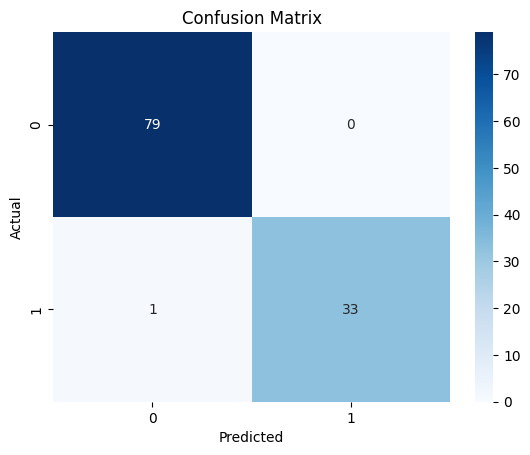

In [1178]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Предсказание
y_pred = knn.predict(X_test_scaled)

# Метрики
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Используя данные наиболее эврестически важные, модель смогла достичь большей точности 99% против 83%.

Из этого следует что стоит использовать именно наиболее имформативные признаки, тогда предсказания будут гораздо точнее

Перебрем значения гиперпараметра k в каком-нибудь диапазоне с использованием кросс-валидации на данныхс отфильтрованными признаками. Построить график train/test accuracy в зависимости от значения k.

In [1179]:
from sklearn.model_selection import cross_val_score
# Диапазон значений k
k_values = range(1, 21)

# Хранение результатов
train_scores = []
test_scores = []
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Кросс-валидация (cv=5)
    cv_score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_scores.append(cv_score)
    
    # Обучение на всей обучающей выборке
    knn.fit(X_train, y_train)
    
    # Точность на train
    train_pred = knn.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)
    
    # Точность на test
    test_pred = knn.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_scores.append(test_acc)

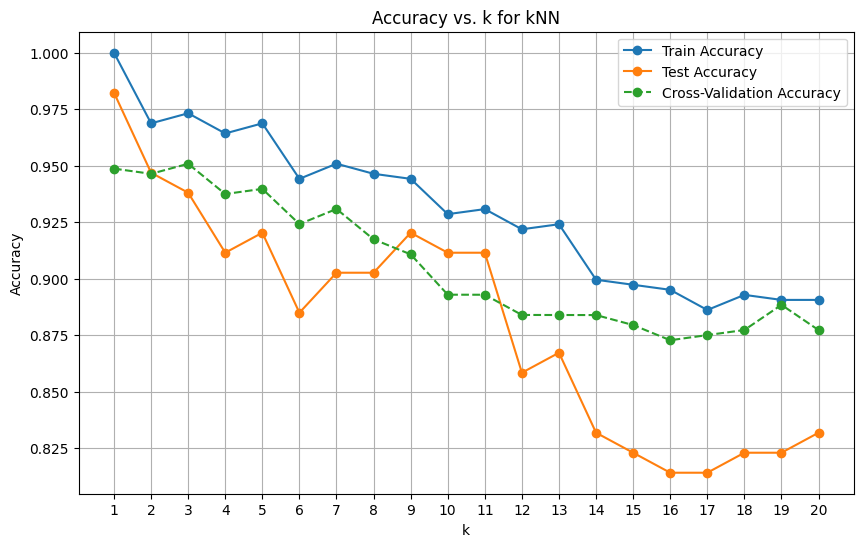

In [1180]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(k_values, test_scores, label='Test Accuracy', marker='o')
plt.plot(k_values, cv_scores, label='Cross-Validation Accuracy', marker='o', linestyle='--')

plt.title('Accuracy vs. k for kNN')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

Для данного датасета увеличение количества соседей приводит только к понижению точности, или небольшим коллебаниям в обратную сторону.

2. Многоклассовая классификация

Выбор датасета.

Следующий датасет будет из тех которые уже являются золотым стандартом, а именно датасет Вина

Набор данных wine содержит информацию о химических характеристиках различных сортов вина, собранных в трех разных классах (сортах). И по этим характеристикам мы и будем классифицировать

In [1181]:
from sklearn.datasets import load_wine
import pandas as pd
# Загрузка данных
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

# Вывод первых строк данных
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Осуществим предобработку данных

In [1182]:
# Проверка пропущенных значений
print("Пропущенные значения:\n", X.isnull().sum())

# Проверка дубликатов
print("Количество дубликатов:", X.duplicated().sum())

Пропущенные значения:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64
Количество дубликатов: 0


Пропущенные значения и дубликаты отсутствуют. Как и категориальные данные, так что следующий пункт пропустим

Нормализируем данные.

In [1183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Нормализация
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Выберу значение гипер параметра K равное 3

Обучим модель с этим К

In [1184]:
from sklearn.neighbors import KNeighborsClassifier

# Обучение модели
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

Подсчет метрик точности

In [1185]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Формирование предсказаний
y_pred = model.predict(X_test_scaled)

# Расчет точности по разным метрикам
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')

# Вывод
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

Accuracy: 0.9722
Precision (macro): 0.9744
Recall (macro): 0.9762
F1-score (macro): 0.9743


In [1186]:
# Отчёт по классам
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.93      0.96        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



Выберем наиболее важные признаки эвристически.

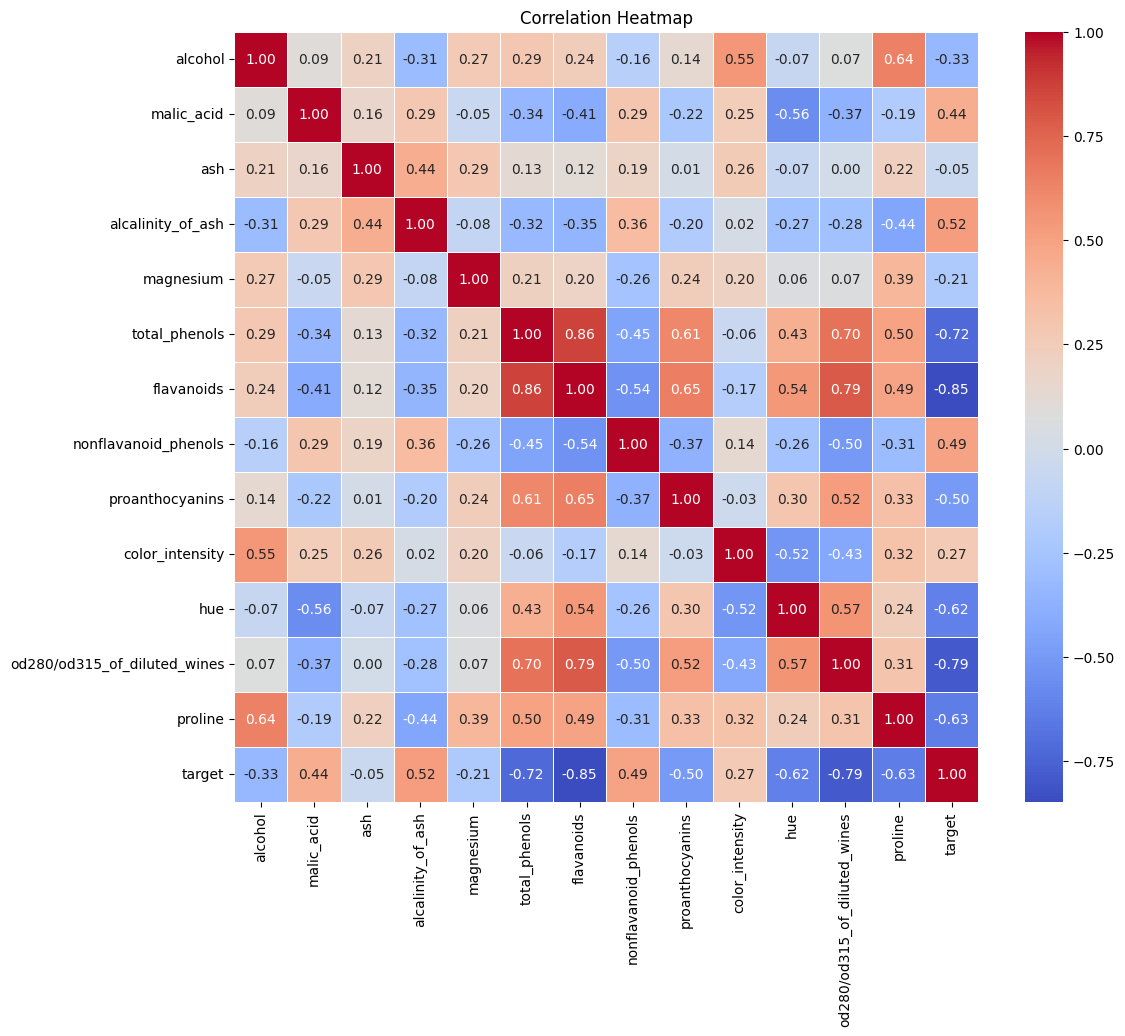

In [1187]:
import matplotlib.pyplot as plt
import seaborn as sns
# Объединение признаков и целевой переменной
data = X.copy()
data['target'] = y

# Вычисление корреляционной матрицы
corr_matrix = data.corr()

# Визуализируем матрицу корреляций

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [1188]:
# Посчитаем коллеряцию с целевой переменной
corr_with_target = corr_matrix['target'].sort_values(ascending=False)
print("Корреляция признаков с целевой переменной:\n", corr_with_target)

Корреляция признаков с целевой переменной:
 target                          1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: target, dtype: float64


Почти все признаки хорошо коллерируют с целевой переменной, но мы отберем только те у которых коллеряция выше чем 0,5

In [1189]:
corr_matrix = data.corr(numeric_only=True)
selected_features = corr_matrix['target'][
    abs(corr_matrix['target']) > 0.5
].dropna().index.tolist()

print("Выбранные признаки:", selected_features)

Выбранные признаки: ['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']


In [1190]:
x = data[selected_features]
y = data['target']

# Разделение на обучающую и тестовую выборки
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(x, y, test_size=0.2, random_state=42)

Проверим, как отбор признаков влияет на точность модели:

In [1191]:
# Нормализация данных
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

In [1192]:
# Обучаем модель на отфильтрованных данных
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train_sel)

KNeighborsClassifier(n_neighbors=3)

Посчитать метрики точности и составим classification_report

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



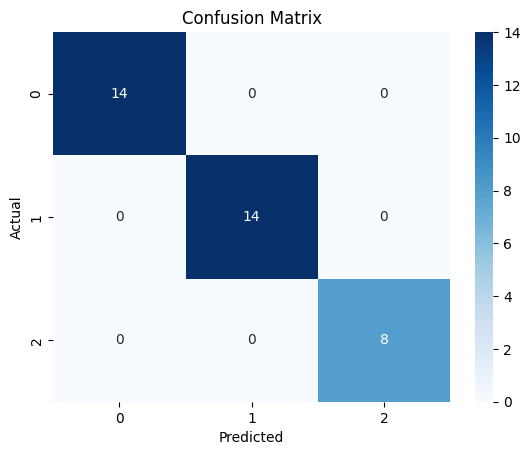

In [1193]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Предсказание
y_pred = model.predict(X_test_scaled)

# Метрики
print("Classification Report:")
print(classification_report(y_test_sel, y_pred))

# Матрица ошибок
conf_matrix = confusion_matrix(y_test_sel, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Точность до фильтрации 97% в среднем, теперь же 100%.
Фильтрация данных позволила увеличить точность прогнозирования модели.

Перебрать значения гиперпараметра k в каком-нибудь диапазоне с использованием кросс-валидации на данных. Построить график train/test accuracy в зависимости от значения k.

In [1194]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Нормализация (без утечки данных)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Диапазон k
k_values = list(range(1, 21))

# Хранилище результатов
train_scores = []
test_scores = []
cv_scores = []

# Перебор k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Кросс-валидация на обучающей выборке
    cv = cross_validate(knn, X_train_scaled, y_train, cv=5, scoring='accuracy', return_train_score=True)
    train_scores.append(cv['train_score'].mean())
    cv_scores.append(cv['test_score'].mean())
    
    # Обучение на всей обучающей выборке
    knn.fit(X_train_scaled, y_train)
    test_scores.append(knn.score(X_test_scaled, y_test))

Графики для визуализации результатов

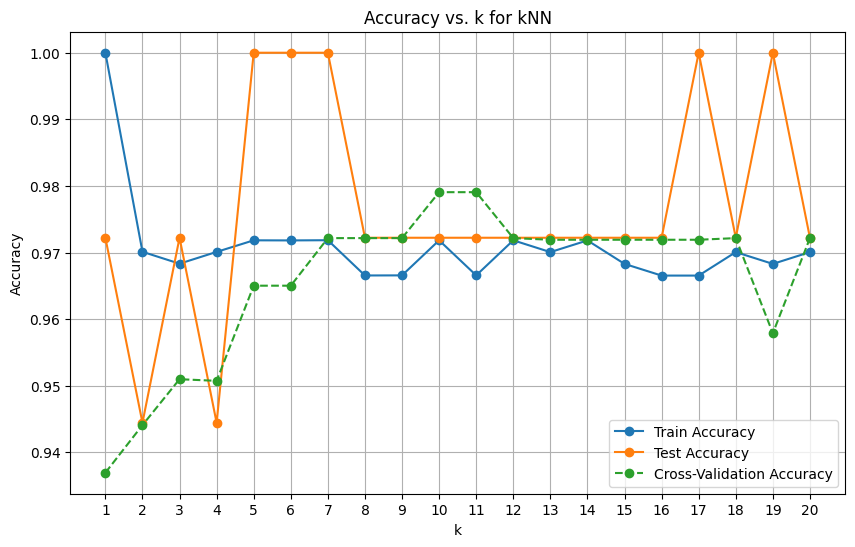

In [1195]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(k_values, test_scores, label='Test Accuracy', marker='o')
plt.plot(k_values, cv_scores, label='Cross-Validation Accuracy', marker='o', linestyle='--')

plt.title('Accuracy vs. k for kNN')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

Для лучшего классификатора привести метрики, classification_report

In [1196]:
# Обучаем модель
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [1197]:
# Предсказания
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

